# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_feldermaeuse.csv")

In [3]:
df.head()

,Scientific name,Deutscher Name,Kat.,IUCN-Kriterien,Bemerkungen
0,Barbastella barbastellus,Mopsfledermaus,EN,"B2ab(iii,iv)",NaN
1,Eptesicus nilssonii,Nordfledermaus,VU,"B2ab(iii,iv)",NaN
2,Eptesicus serotinus,Breitflügelfledermaus,VU,"B2ab(iii,iv)",NaN
3,Hypsugo savii,Alpenfledermaus,NT,NaN,"Unterschätzte Verbreitung, möglicherweise in A..."
4,Miniopterus schreibersii,Langflügelfledermaus,EN,B2ac(iv);D,"Keine Fortpflanzung, stark abhängig von der Dy..."


In [4]:
len (df)

28

In [5]:
df.shape

(28, 5)

In [6]:
df.pop("IUCN-Kriterien")

0                   B2ab(iii,iv)
1                   B2ab(iii,iv)
2                   B2ab(iii,iv)
3                            NaN
4                     B2ac(iv);D
5                            NaN
6                      B2ab(iii)
7                B2ab(iii,iv);D1
8                   B2ab(iii,iv)
9                            NaN
10                           NaN
11                  B2ab(ii,iii)
12                   B2b(iii,iv)
13                           NaN
14                       B2b(iv)
15                      B2b(iii)
16                      B2b(iii)
17                           NaN
18                           NaN
19                           NaN
20                      B2ab(iv)
21                     B2ab(iii)
22                  B2ab(iii,iv)
23                  B2ab(iii,iv)
24                           NaN
25    A2(c);B2ab (iii,iv); C1; D
26           A1(c);B2ab (iii,iv)
27                     B2ac(iii)
Name: IUCN-Kriterien, dtype: object

In [7]:
df.head(3)

,Scientific name,Deutscher Name,Kat.,Bemerkungen
0,Barbastella barbastellus,Mopsfledermaus,EN,NaN
1,Eptesicus nilssonii,Nordfledermaus,VU,NaN
2,Eptesicus serotinus,Breitflügelfledermaus,VU,NaN


In [8]:
df.rename(columns={"Scientific name":"sc name", "Deutscher Name": "dt name","Kat.":"cat", "Bemerkungen":"bemerkungen"},inplace=True)

In [9]:
df['einteilung'] = 'Säugetiere'
df['untergruppe'] = 'Fledermäuse'

In [10]:
df.head(1)

,sc name,dt name,cat,bemerkungen,einteilung,untergruppe
0,Barbastella barbastellus,Mopsfledermaus,EN,NaN,Säugetiere,Fledermäuse


In [11]:
df["cat"].value_counts()

NT    7
VU    6
EN    5
LC    4
DD    3
CR    3
Name: cat, dtype: int64

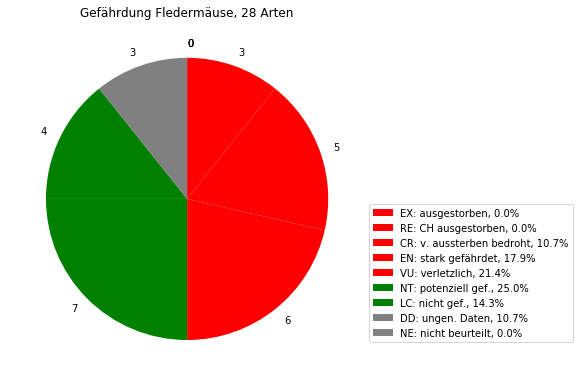

In [12]:
values = [0, 0, 3, 5, 6, 7, 4, 3, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Fledermäuse, 28 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()